In [1]:
%matplotlib inline

from matplotlib import pyplot as plt

In [2]:
import os
import numpy as np
isbn = "978-1-78398-948-5"
import sklearn
rgb = np.array(['r', 'g', 'b'])

#Getting Ready

KMeans is probably one of the most well known clustering algorithms, and in a larger sense, on the most well known unsupervised learning techniques.

First let's walk though some simple clustering, then we'll talk about how KMeans works.

In [3]:
from sklearn.datasets import make_blobs
blobs, classes = make_blobs(500, centers=3)

#How to do it

First, looking at our blobs, we can see that there are three distinct clusters.

In [4]:
ls *jpg

 Volume in drive C is Windows
 Volume Serial Number is 963B-1E43

 Directory of C:\Users\scetinkaya\Data\Apps\BOOKS\Python\ML\Trent Hauck - scikit-learn Cookbook_ Over 50\chapter3



File Not Found


Text(0.5,1,'Blobs')

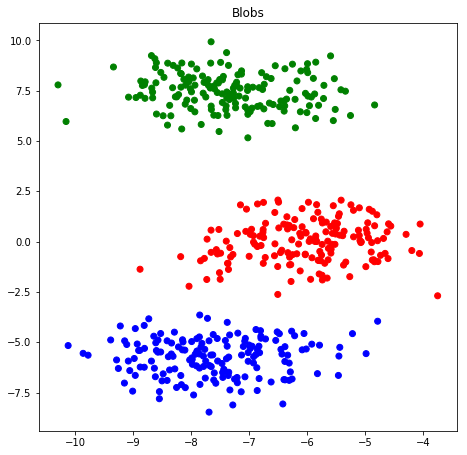

In [5]:
f, ax = plt.subplots(figsize=(7.5, 7.5))
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.set_title("Blobs")
#f.savefig("978-1-78398-948-5_1.jpg")

Now we can use kmeans to find the centers of these clusters.  In the first example we'll pretend we know that there are, in fact, three centers.

In [15]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)

In [16]:
kmean.fit(blobs)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [17]:
kmean.cluster_centers_

array([[ 5.62827871,  3.98297442],
       [ 1.61344079, -0.47273188],
       [ 4.8843069 ,  1.61449219]])

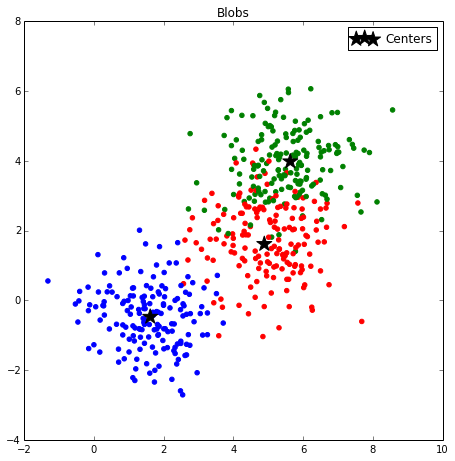

In [19]:
#don't show
f, ax = plt.subplots(figsize=(7.5, 7.5))
ax.scatter(blobs[:, 0], blobs[:, 1], color=rgb[classes])
ax.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], marker='*', s=250, color='black', label='Centers')
ax.set_title("Blobs")
ax.legend(loc='best')

#f.savefig("978-1-78398-948-5_2.jpg")

Other attributes are useful too  For instance, the `labels_` attribute will product the expected label for each point.

In [20]:
kmean.labels_[:5]

array([2, 1, 0, 1, 1], dtype=int32)

We could check if `kmean.labels_` is the same as `classes`, but because kmeans has no knowledge of the classes going in, it cannot assign the sample index values to both classes.

In [8]:
classes[:5]

array([0, 2, 0, 2, 0])

Feel free to swap the 1 and 0 in classes to see if it matches up with labels_.

`transform` is a useful, in that it will output the distance between each point and each centroid.

In [11]:
kmean.transform(blobs[:5])

NameError: name 'kmean' is not defined

#How it works

KMeans is actually a very simple algorithm that works to minimize the within-cluster sum of square distances from the mean.  Minimizing the sum of squares shows itself again!

It does this by first setting a pre-specified number of clusters, K, then alternating between.

1. Assigning each observation to the nearest cluster.
2. Update each centroid by calculating the mean of the each observation assigned to that cluster.

This happens until some specified criteria is met.

#There's More

What's next